In [2]:
# Identify the current working directory
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/ching-lung/deposit-prediction/ARIMA


In [4]:
# You can suppress warnings by using Python's built-in warnings module. 
# Add this code to suppress warnings globally in your notebook:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [7]:
# Load the .csv file into a DataFrame
df = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/data_clean.csv")
df = df.iloc[:, :-7]
df_o = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/data_clean.csv")

# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

df_fea_train= df.drop(columns=['Date'])

In [10]:
import statsmodels.api as sm

In [11]:
from statsmodels.tsa.api import ARIMA

In [14]:
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

In [16]:
cv = TimeSeriesSplit(n_splits=10, test_size=3)


In [18]:
# Load the .csv file into a DataFrame
df_X = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/stress_basline.csv")

# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Setting Training & Testing Dataset
dep_train_2027 = df_o['Deposits']
date_train_2027 = df['Date']
df_test_X = df_X.drop(columns=['Date'])
df_test_date = df_X['Date']

In [20]:
from sklearn.model_selection import TimeSeriesSplit

# Example time series data (replace with your actual data)
time_series_data = dep_train_2027.values  # Assuming dep_train is your data

# Number of splits for TimeSeriesSplit
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

# Iterate over the splits and print the indices
for fold, (train_idx, test_idx) in enumerate(tscv.split(time_series_data)):
    print(f"Fold {fold + 1}")
    print(f"  Train indices: {train_idx}")
    print(f"  Test indices: {test_idx}")
    # print(f"  Train data: {time_series_data[train_idx]}")
    # print(f"  Test data: {time_series_data[test_idx]}")


Fold 1
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55]
Fold 2
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
  Test indices: [56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81]
Fold 3
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]
  Test indices: [ 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107]
Fold 4
  Train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  1

In [22]:
#lowest average

sarima = ARIMA(dep_train_2027.values,
                    order = (1,1,1),
                    seasonal_order = (0,1,2,7)).fit()
#best MASE in 5th fold
sarima.summary()
#(1,1,1)(0,1,2)[7] 
#(1,2,2)(0,0,0)[3]  
#(0,2,0)(0,1,1)[40] 
#(1,1,1)(0,1,0)[31]     
#(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 4),

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  160
Model:             ARIMA(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -2064.383
Date:                              Sat, 07 Dec 2024   AIC                           4138.766
Time:                                      23:13:24   BIC                           4153.886
Sample:                                           0   HQIC                          4144.908
                                              - 160                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7212      0.102      7.085      0.000       0.522       0.921
ma.L1         -0.4541      0.118     -3.835      0.000      -0.686      -0.222
ma.S.L7       -0.5341      0.068     -7.864      0.000      -0.667      -0.401
ma.S.L14      -0.2056      0.048     -4.287      0.000      -0.300      -0.112
sigma2      4.368e+10   4.96e-13   8.81e+22      0.000    4.37e+10    4.37e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.87   Jarque-Bera (JB):               641.01
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+39. Standard errors may be unstable.
"""

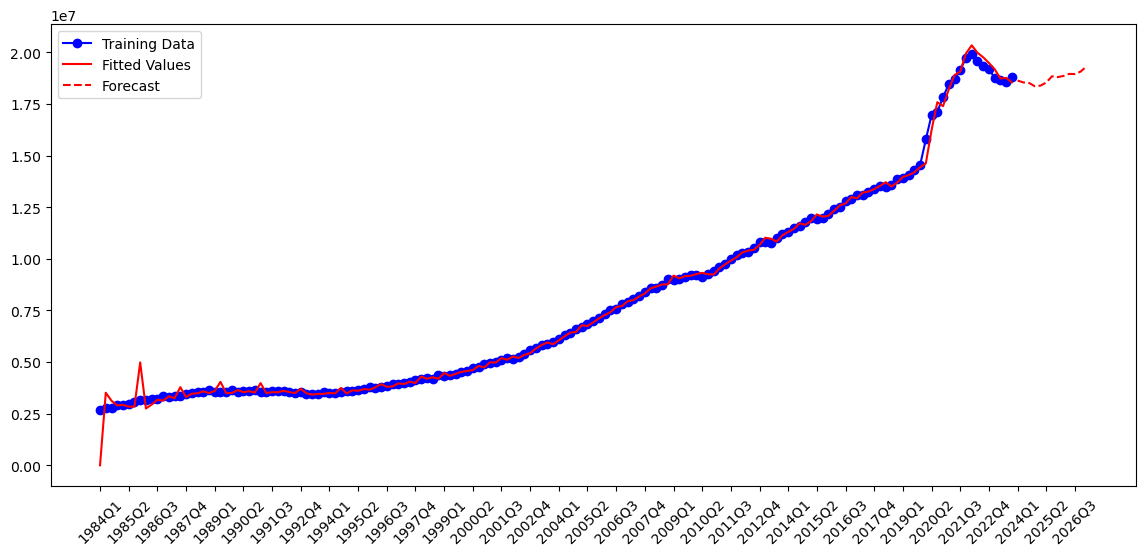

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train_2027,
         dep_train_2027,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_train_2027,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(df_X.Date,
         sarima.forecast(len(df_test_date)),
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([df['Date'][::5], df_test_date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()







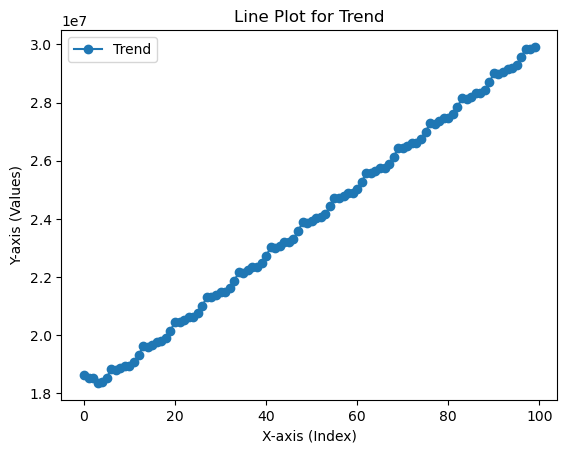

In [26]:
# This plot shows that the future trend of SARIMA 
y_values = sarima.forecast(100)

# Generate x-values (indices for y-values if not provided)
x_values = np.arange(len(y_values))

# Create the line plot
plt.plot(x_values, y_values, marker='o', linestyle='-', label='Trend')

# Add labels and title
plt.xlabel('X-axis (Index)')
plt.ylabel('Y-axis (Values)')
plt.title('Line Plot for Trend')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_fea_train, df_o['Deposits'], test_size=0.1, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the pipeline
lasso = Lasso(max_iter=10000)
rfe = RFE(estimator=lasso)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure scaling is part of the pipeline
    ('feature_selection', rfe)
])

# Define the parameter grid
param_grid = {
    'feature_selection__estimator__alpha': [0.1, 1, 10, 100, 500, 1000, 5000,100000],
    'feature_selection__n_features_to_select': list(range(5, 17))  # Test n_features_to_select from 1 to 20
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_alpha = grid_search.best_params_['feature_selection__estimator__alpha']
best_n_features = grid_search.best_params_['feature_selection__n_features_to_select']
print(f"Best alpha: {best_alpha}")
print(f"Best n_features_to_select: {best_n_features}")

# Use the best parameters
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
selector_best = RFE(estimator=lasso_best, n_features_to_select=best_n_features)
selector_best.fit(X_train_scaled, y_train)

# Get the selected features
selected_mask = selector_best.get_support()
selected_features = np.where(selected_mask)[0]

print(f"Selected features based on optimized RFE and Lasso: {selected_features}")


Best alpha: 5000
Best n_features_to_select: 13
Selected features based on optimized RFE and Lasso: [ 0  1  2  4  5  7  8  9 10 11 12 13 14]


In [30]:

# # Assuming df_X and df['Deposits'] are defined

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_fea_train, df_o['Deposits'], test_size=0.1, random_state=42)

# # Apply normalization to the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize Lasso as the estimator for RFE
# lasso = Lasso(alpha=1000, max_iter=5000)

# # Initialize RFE with Lasso as the estimator
# selector = RFE(estimator=lasso, n_features_to_select=10)

# # Fit the RFE model to the data
# selector = selector.fit(X_train_scaled, y_train)

# # Get the selected features
# selected_mask = selector.get_support()

# # Print which features are selected
# selected_features = np.where(selected_mask)[0]

# print(f"Selected features based on RFE with Lasso: {selected_features}")


Selected features based on RFE with Lasso: [ 0  1  4  6  7  8 11 12 13 14]


In [15]:
# # Example DataFrame
# import pandas as pd
# indices_to_pick = [ 0,  1,  4,  6,  7,  8,  9, 11, 12, 13 ,14, 16]

# print(f"Selected features based on RFE with Lasso: {selected_features}")

# print("Feature Ranking:", selector_best.ranking_)

# # Retrieve the importance of selected features
# print("Feature Coefficients:", selector_best.estimator_.coef_)
# # Display column names corresponding to the indices
# selected_columns_ind = df_X.columns[indices_to_pick]
# print("Selected Columns:", list(selected_columns_ind))


Selected features based on RFE with Lasso: [ 0  1  4  6  7  8  9 11 12 13 14 16]
Feature Ranking: [1 1 4 5 1 6 1 1 1 1 3 1 1 1 1 2 1]
Feature Coefficients: [ -947131.86536386   944010.50550279   650444.818412    -360445.63338927
  2136065.74329143 -1649829.46195703  -913890.0950018  -1296799.72407061
  1947453.2746663    727458.7497993   2853917.91355841   324562.47588436]
Selected Columns: ['Scenario Name', 'Date', 'Real disposable income growth', 'Unemployment rate', 'CPI inflation rate', '3-month Treasury rate', '5-year Treasury yield', 'BBB corporate yield', 'Mortgage rate', 'Prime rate', 'Dow Jones Total Stock Market Index (Level)', 'Commercial Real Estate Price Index (Level)']


In [36]:
np.where(selected_mask)[0]

array([ 0,  1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14])

In [38]:
selected_indices = np.where(selected_mask)[0]
#[0,3,4,5,6,9,10,11,12]

In [41]:

# Identify common columns
common_columns = df_X.columns.intersection(df_fea_train.columns)

# Keep only common columns in both DataFrames, without aligning rows
df_X = df_X[common_columns]
df_fea_train = df_fea_train[common_columns]

In [43]:
df_X.iloc[:, selected_indices].head(3)

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Unemployment rate,CPI inflation rate,5-year Treasury yield,10-year Treasury yield,Mortgage rate,Prime rate,House Price Index (Level),Commercial Real Estate Price Index (Level),Real GDP,Real disposable income
0,1.0,3.2,2.5,3.9,2.4,4.2,4.1,6.5,8.4,311.6,350.2,274365.72,242767.12
1,0.7,2.9,1.8,4.1,2.3,4.0,4.0,6.1,8.1,312.8,351.5,276286.28,247136.93
2,0.9,3.1,1.8,4.2,2.4,3.9,3.9,5.8,7.7,313.9,352.8,278772.86,251585.39


In [47]:
df_fea_train.iloc[:, selected_indices].tail(3)

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Unemployment rate,CPI inflation rate,5-year Treasury yield,10-year Treasury yield,Mortgage rate,Prime rate,House Price Index (Level),Commercial Real Estate Price Index (Level),Real GDP,Real disposable income
157,2.1,3.8,3.3,3.6,2.7,3.7,3.7,6.5,8.2,303.0,354.0,255133.18,231054.36
158,4.9,8.3,0.3,3.7,3.6,4.3,4.2,7.0,8.4,309.3,348.9,267634.71,231747.52
159,1.5,3.6,2.2,3.7,2.8,4.5,4.5,7.3,8.5,310.5,348.9,271649.23,236845.97


In [49]:
train_features =scaler.fit_transform(df_fea_train.iloc[:, selected_indices])
test_features = scaler.transform(df_X.iloc[:, selected_indices])

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]
#(1,0,1)(2,1,1)[2]
#(1,2,2)(0,0,0)[3] 

model = SARIMAX(
    endog = dep_train_2027.values,
    exog = train_features,
    order = (1,1,1), # Example: (1, 1, 1)
    seasonal_order = (0,1,2,7),  # Example: (1, 1, 1, 12) for yearly seasonality
)

sarima_fea = model.fit(disp=False)
sarima_fea.summary()
#(0,2,0)(0,1,1)[40] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  160
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -2059.129
Date:                                Sat, 07 Dec 2024   AIC                           4154.258
Time:                                        23:18:59   BIC                           4208.688
Sample:                                             0   HQIC                          4176.369
                                                - 160                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           1.24e+04   8.73e+04      0.142      0.887   -1.59e+05    1.84e+05
x2          -494.2173   9.15e+04     -0.005      0.996    -1.8e+05    1.79e+05
x3         -4.275e+04   1.44e+04     -2.959      0.003   -7.11e+04   -1.44e+04
x4         -1.373e+05   4.06e+04     -3.384      0.001   -2.17e+05   -5.78e+04
x5         -8254.0697   1.77e+04     -0.467      0.641   -4.29e+04    2.64e+04
x6         -3.876e+05   1.91e+05     -2.033      0.042   -7.61e+05   -1.39e+04
x7          4.654e+05   1.48e+05      3.138      0.002    1.75e+05    7.56e+05
x8         -1.821e+05   2.49e+05     -0.731      0.464    -6.7e+05    3.06e+05
x9         -2.488e+05   1.27e+05     -1.957      0.050   -4.98e+05     432.322
x10         1.402e+06   3.57e+05      3.928      0.000    7.02e+05     2.1e+06
x11         5.031e+05   1.82e+05      2.762      0.006    1.46e+05     8.6e+05
x12         -1.61e+06   2.82e+05     -5.711      0.000   -2.16e+06   -1.06e+06
x13         3.832e+05   1.26e+05      3.051      0.002    1.37e+05    6.29e+05
ar.L1          0.6527      0.256      2.548      0.011       0.151       1.155
ma.L1         -0.5505      0.270     -2.037      0.042      -1.080      -0.021
ma.S.L7       -0.2535      0.065     -3.899      0.000      -0.381      -0.126
ma.S.L14      -0.1375      0.036     -3.866      0.000      -0.207      -0.068
sigma2      3.424e+10     20.913   1.64e+09      0.000    3.42e+10    3.42e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.10   Jarque-Bera (JB):               125.72
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.79e+24. Standard errors may be unstable.
"""

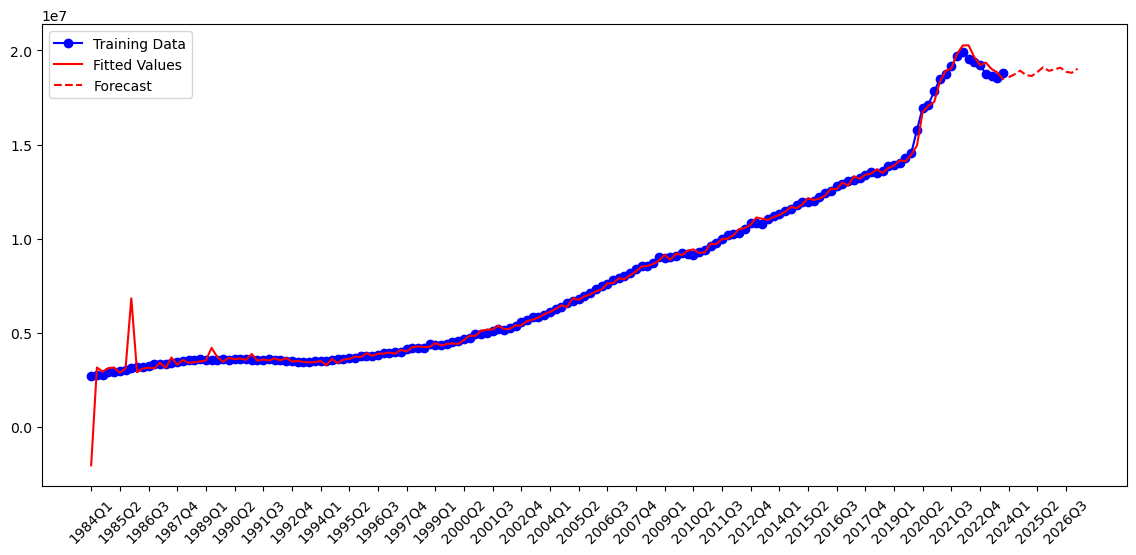

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y_preds = sarima_fea.forecast(steps=len(df_test_date), exog=test_features)

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train_2027,
         dep_train_2027.values,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_train_2027,
          sarima_fea.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot( df_test_date,
          y_preds,
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train_2027[::5], df_test_date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()


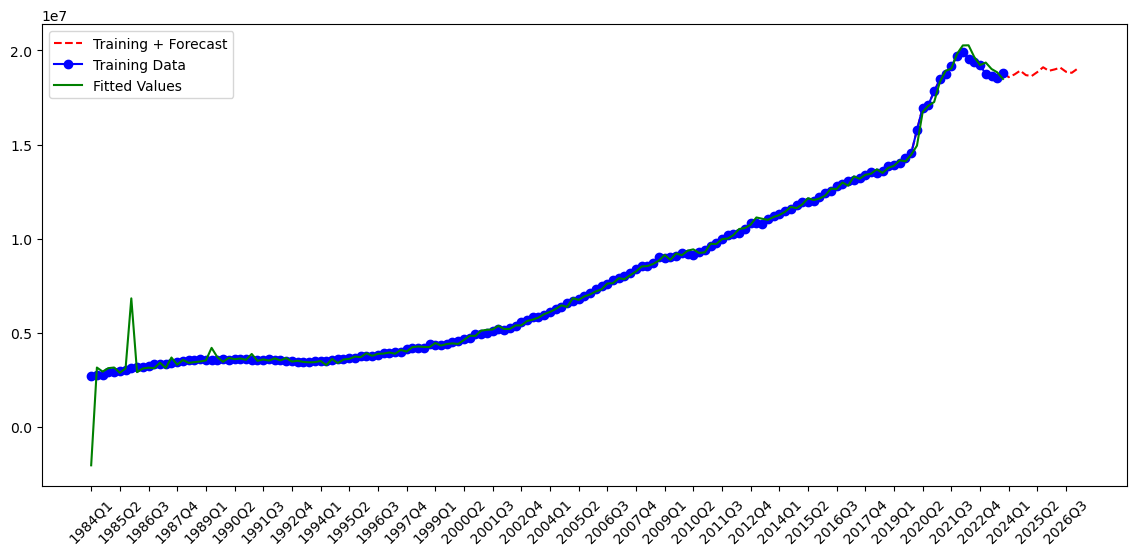

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Forecast for test data
y_preds = sarima_fea.forecast(steps=len(df_test_date), exog=test_features)

plt.figure(figsize=(14, 6))

# Combine training and test dates
combined_dates = np.concatenate([date_train_2027, df_test_date])

# Combine training data and forecast
combined_values = np.concatenate([dep_train_2027, y_preds])

# Plot the continuous line for both training and test data
plt.plot(combined_dates, combined_values, 'r--', label="Training + Forecast")

# Plot training data points for clarity
plt.plot(date_train_2027, dep_train_2027, 'b-o', label="Training Data")

# Plot fitted values for training data
plt.plot(date_train_2027, sarima_fea.fittedvalues, 'g-', label="Fitted Values")

# Customize x-axis ticks to display every 5th label with rotation
xticks = np.concatenate([date_train_2027[::5], df_test_date[::5]])
plt.xticks(xticks, rotation=45, fontsize=10)

# Add legend and show plot
plt.legend()
plt.show()


In [59]:
y_preds

array([18578545.11751639, 18720391.17835731, 18922524.11737389,
       18684668.08636473, 18638605.07644426, 18849464.12881424,
       19102549.2026948 , 18914734.59913512, 18988043.95087966,
       19082023.3933698 , 18861745.86480875, 18809010.96170017,
       19028385.5949052 ])

In [61]:
#Prediction for 2024-2027

In [9]:
# Load the .csv file into a DataFrame
df_X = pd.read_csv("/Users/sherrywang/deposit-prediction/cleaned_data/stress_basline.csv")


# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


dep_train_2027 = df_o['Deposits']
date_train_2027 = df['Date']
df_test_X= df_X.drop(columns=['Date'])
df_test_date = df_X['Date']

In [228]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#use one trainning set to fit and get lowest average
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []

    # Step 1: Fit the ARIMA model using the entire training dataset
    try:
        print(f"Fitting ARIMA model for m={m} on the entire training set...")
        model = auto_arima(
            dep_train_2027.values,  # Entire training dataset
            seasonal=True,
            m=m,
            D = 1,
            d=1,
            max_p=10,
            max_q=10,
            trace=False,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )
        print(f"Fitted model for m={m}")
    except Exception as e:
        print(f"Failed to fit model for m={m}: {e}")
        continue

    # Step 2: Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train_2027.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test for the current fold
            train, test = dep_train_2027.values[train_idx], dep_train_2027.values[test_idx]
            
            # Predict on the test set using the pre-fitted model
            preds = model.predict(len(test), exogenous=None)
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Step 3: Compute the average MASE score across folds
    if fold_scores:
        avg_score = np.mean(fold_scores)
        print(f"  Average MASE for m={m}: {avg_score:.4f}")
        results[m] = avg_score

        # Update the best m if the average score is lower
        if avg_score < best_score:
            best_score = avg_score
            best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


Evaluating seasonal period m=1
Fitting ARIMA model for m=1 on the entire training set...
Fitted model for m=1
  Fold 1
    MASE: 28.4061
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 2
    MASE: 64.6552
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 3
    MASE: 30.2804
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 4
    MASE: 11.5997
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 5
    MASE: 3.5187
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Average MASE for m=1: 27.6920
Evaluating seasonal period m=2
Fitting ARIMA model for m=2 on the entire training set...
Fitted model for m=2
  Fold 1
    MASE: 28.9804
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 2
    MASE: 66.0806
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 3
    MASE: 31.1206
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 4
    MASE: 12.0417
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 5
    MASE: 3.8609
 ARIMA(0,1,0)(1,1,1)[2]          
  Average MASE for m=2: 28.4168
Evaluating seasonal period m=3
Fitting ARIMA model for m=3 on the entire training set...
Fitted model for m=

In [229]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#best fold MASE
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_scores = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 39
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train_2027.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = dep_train_2027.values[train_idx], dep_train_2027.values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D=1,
                d=1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Average MASE score across folds
    print(model)
    results[m] = [score,model,fold]
   


# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best MASE: {best_scores:.4f}")
sorted_results = sorted(results.items(), key=lambda x: x[1][0])
print(sorted_results[1])


Evaluating seasonal period m=1
  Fold 1
    MASE: 0.5004
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 2
    MASE: 2.4041
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 3
    MASE: 3.1543
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 4
    MASE: 1.4973
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 5
    MASE: 2.6180
 ARIMA(0,1,0)(0,0,0)[0] intercept
 ARIMA(0,1,0)(0,0,0)[0] intercept
Evaluating seasonal period m=2
  Fold 1
    MASE: 1.1107
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 2
    MASE: 0.5563
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 3
    MASE: 0.9658
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 4
    MASE: 0.7128
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 5
    MASE: 2.0349
 ARIMA(1,1,0)(1,1,1)[2]          
 ARIMA(1,1,0)(1,1,1)[2]          
Evaluating seasonal period m=3
  Fold 1
    MASE: 0.5709
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 2
    MASE: 0.5114
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 3
    MASE: 0.3575
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 4
    MASE: 1.3804
 ARIMA(0,1,0)(0,1,0)[3]          